# Importing Libraries


In [ ]:
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation

import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical visualization

from wordcloud import WordCloud  # Word cloud visualization for text data

from sklearn.preprocessing import LabelEncoder  # Encode target labels

from sklearn.metrics import confusion_matrix, accuracy_score  # Evaluation metrics
from sklearn.metrics import roc_auc_score  # Additional metric for classification

# from imblearn.over_sampling import SMOTE  # Handle imbalanced datasets (optional)

from sklearn.feature_extraction.text import TfidfVectorizer  # Text to TF-IDF features

from sklearn.linear_model import LogisticRegression  # Linear model
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier  # Decision tree
from sklearn.ensemble import RandomForestClassifier  # Ensemble of trees
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes for text


# Importing Dependencies

In [19]:
df = pd.read_csv(r'D:\Financial-Sentiment-Analysis\notebook\data\data.csv')

In [20]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


# Data Inspection

In [21]:
df.shape

(5842, 2)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [23]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Net sales decreased to EUR 220.5 mn from EUR 4...,neutral
freq,2,3130


## Handling Duplicate Values

In [24]:
df.duplicated().sum()

np.int64(6)

In [25]:
df = df.drop_duplicates()

In [26]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [27]:
df = df.reset_index()

In [28]:
df['Sentiment'].value_counts()

Sentiment
neutral     3124
positive    1852
negative     860
Name: count, dtype: int64

In [29]:
X = df['Sentence']
y = df['Sentiment']

<Axes: xlabel='Sentiment', ylabel='count'>

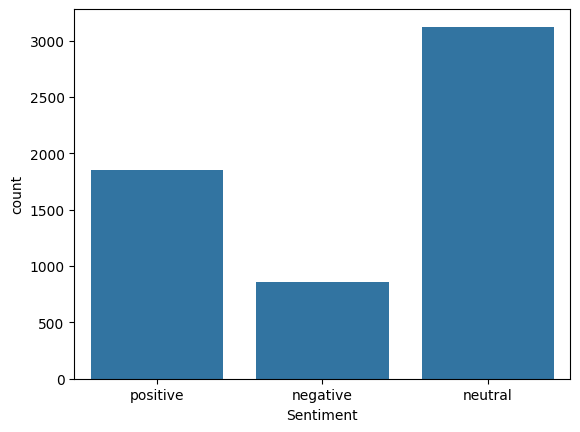

In [30]:
sns.countplot(data=df,x=y)

## Encoding Categorical values

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Text Preprocessing

### Importing text preprocessing dependencies

In [32]:
import re
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [33]:
def clean_and_stem_text(text):
    """
    Cleans and stems input text by:
    - Lowercasing
    - Removing digits
    - Removing punctuation
    - Removing extra whitespace
    - Removing non-alphabetical characters
    - Removing stopwords
    - Applying Porter stemming
    
    Parameters:
    text (str): The raw input text to clean and stem.
    
    Returns:
    str: The cleaned and stemmed text.
    """
    # Lowercase text
    text = text.lower()
    
    # Remove digits
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove any non-alphabet characters (just in case)
    text = re.sub('[^a-zA-Z\s]', '', text)
    
    # Tokenize
    words = text.split()
    
    # Initialize stemmer and stopwords set (for efficiency)
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    # Remove stopwords and stem
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    # Join back into a single string
    return ' '.join(processed_words)

# Example usage with a pandas Series X (assumed to contain text data):
X_cleaned = X.apply(clean_and_stem_text)

# If X is a list or array-like, you can convert it to a pd.Series first:
# X_series = pd.Series(X)
# X_cleaned = X_series.apply(clean_and_stem_text)

# Finally, convert to numpy array if needed:
X_processed = np.array(X_cleaned)


<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
C:\Users\asd\AppData\Local\Temp\ipykernel_5672\1967771218.py:31: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('[^a-zA-Z\s]', '', text)


Now we need to use a method for text vectorization.
There are many ways to perform it.
They have their our pros and cons.

1. Bag of Words (BOW)
2. TF-IDF
3. Word Embedding
    * Word2Vec
    * GloVe
4. Deep Learnings
    * LSTM
6. Using Tools
    * HuggingFace
    * Gemini Pro
    * Claude
    *  

## Using CountVectorizer with train-test-split and K-Fold

------------logistic-------------

logistic cross-validation accuracy scores: [0.67023555 0.65738758 0.64775161 0.66130761 0.66666667]
logistic mean CV accuracy: 0.6607
--------------------------------------------------------------------------------
logistic test accuracy score: 0.6763698630136986
--------------------------------------------------------------------------------
logistic classification report:
              precision    recall  f1-score   support

           0       0.34      0.24      0.28       172
           1       0.70      0.79      0.74       625
           2       0.74      0.68      0.71       371

    accuracy                           0.68      1168
   macro avg       0.60      0.57      0.58      1168
weighted avg       0.66      0.68      0.67      1168

--------------------------------------------------------------------------------


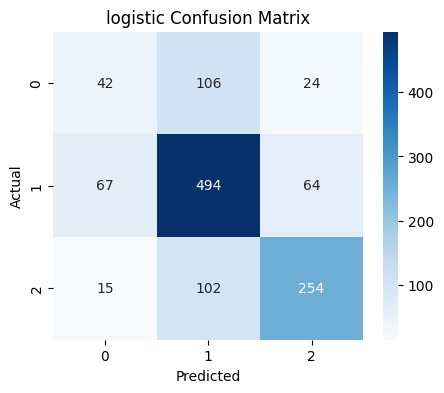

------------svc-------------

svc cross-validation accuracy scores: [0.65952891 0.66595289 0.65310493 0.66237942 0.64415863]
svc mean CV accuracy: 0.6570
--------------------------------------------------------------------------------
svc test accuracy score: 0.6857876712328768
--------------------------------------------------------------------------------
svc classification report:
              precision    recall  f1-score   support

           0       0.37      0.09      0.14       172
           1       0.66      0.92      0.77       625
           2       0.81      0.56      0.66       371

    accuracy                           0.69      1168
   macro avg       0.61      0.52      0.53      1168
weighted avg       0.67      0.69      0.64      1168

--------------------------------------------------------------------------------


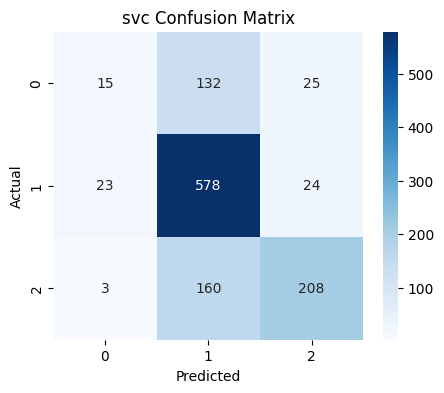

------------tree-------------

tree cross-validation accuracy scores: [0.63276231 0.624197   0.61134904 0.59807074 0.6323687 ]
tree mean CV accuracy: 0.6197
--------------------------------------------------------------------------------
tree test accuracy score: 0.5993150684931506
--------------------------------------------------------------------------------
tree classification report:
              precision    recall  f1-score   support

           0       0.17      0.17      0.17       172
           1       0.67      0.69      0.68       625
           2       0.67      0.64      0.66       371

    accuracy                           0.60      1168
   macro avg       0.50      0.50      0.50      1168
weighted avg       0.60      0.60      0.60      1168

--------------------------------------------------------------------------------


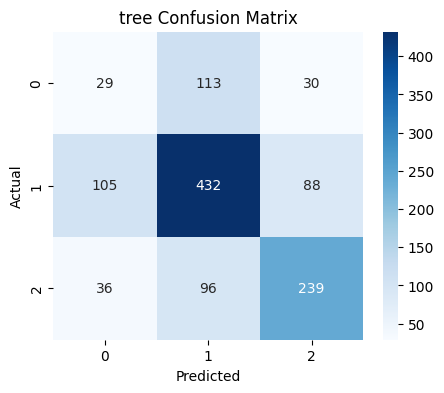

------------ensemble-------------

ensemble cross-validation accuracy scores: [0.64882227 0.65845824 0.63276231 0.64308682 0.65380493]
ensemble mean CV accuracy: 0.6474
--------------------------------------------------------------------------------
ensemble test accuracy score: 0.6566780821917808
--------------------------------------------------------------------------------
ensemble classification report:
              precision    recall  f1-score   support

           0       0.24      0.14      0.18       172
           1       0.67      0.82      0.74       625
           2       0.76      0.62      0.69       371

    accuracy                           0.66      1168
   macro avg       0.56      0.53      0.53      1168
weighted avg       0.64      0.66      0.64      1168

--------------------------------------------------------------------------------


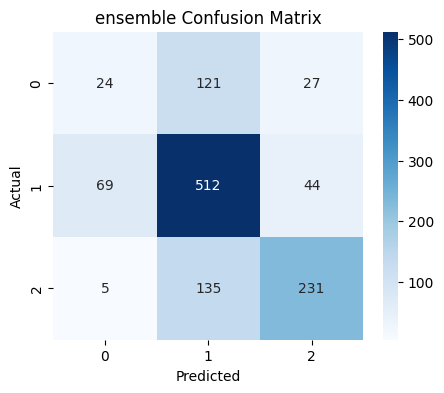

------------naive_bayes-------------

naive_bayes cross-validation accuracy scores: [0.67344754 0.67344754 0.66488223 0.6795284  0.66345123]
naive_bayes mean CV accuracy: 0.6710
--------------------------------------------------------------------------------
naive_bayes test accuracy score: 0.6917808219178082
--------------------------------------------------------------------------------
naive_bayes classification report:
              precision    recall  f1-score   support

           0       0.44      0.38      0.41       172
           1       0.74      0.81      0.77       625
           2       0.71      0.64      0.67       371

    accuracy                           0.69      1168
   macro avg       0.63      0.61      0.62      1168
weighted avg       0.69      0.69      0.69      1168

--------------------------------------------------------------------------------


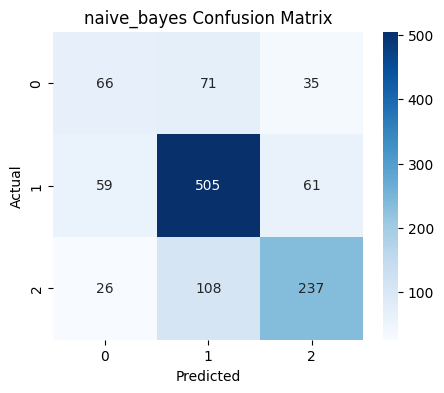

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Split the dataset into training and test sets (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Initialize CountVectorizer for Bag-of-Words extraction
cv = CountVectorizer()

# 3. Fit CountVectorizer on training data and transform into vector space
X_train_cv = cv.fit_transform(X_train)

# 4. Transform test data using the vocabulary fitted on training data
X_test_cv = cv.transform(X_test)

# 5. Define models for training and evaluation
models = {
    "logistic": LogisticRegression(max_iter=200),
    "svc": SVC(),
    "tree": DecisionTreeClassifier(),
    "ensemble": RandomForestClassifier(),
    "naive_bayes": MultinomialNB()
}

# 6. Perform cross-validation and final evaluation
for name, model in models.items():
    print(f"------------{name}-------------\n")

    # Cross-validation on training set (e.g., 5-fold)
    cv_scores = cross_val_score(model, X_train_cv, y_train, cv=5, scoring='accuracy')
    print(f"{name} cross-validation accuracy scores: {cv_scores}")
    print(f"{name} mean CV accuracy: {np.mean(cv_scores):.4f}")
    print('-' * 80)

    # Train the model on full training set
    model.fit(X_train_cv, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_cv)

    # Accuracy on the test set
    y_acc = accuracy_score(y_test, y_pred)
    print(f"{name} test accuracy score: {y_acc}")
    print('-' * 80)

    # Classification report on test set
    print(f"{name} classification report:\n{classification_report(y_test, y_pred)}")
    print('-' * 80)

    # Confusion matrix on test set
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("=" * 80)


## Using CountVectorizer with train-test-split and Stratified K-Fold

------------logistic-------------

Fold 1 accuracy: 0.6767
Fold 2 accuracy: 0.6574
Fold 3 accuracy: 0.6638
Fold 4 accuracy: 0.6656
Fold 5 accuracy: 0.6559

Mean CV accuracy: 0.6639
--------------------------------------------------------------------------------
logistic test accuracy score: 0.6763698630136986
--------------------------------------------------------------------------------
logistic classification report:
              precision    recall  f1-score   support

           0       0.34      0.24      0.28       172
           1       0.70      0.79      0.74       625
           2       0.74      0.68      0.71       371

    accuracy                           0.68      1168
   macro avg       0.60      0.57      0.58      1168
weighted avg       0.66      0.68      0.67      1168

--------------------------------------------------------------------------------


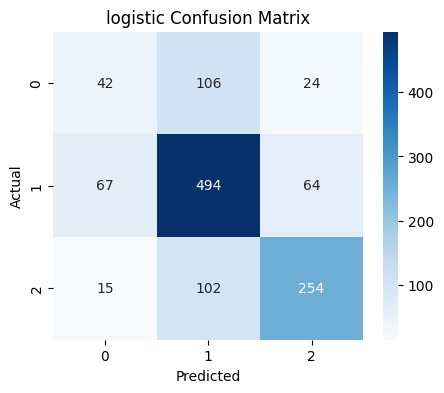

------------svc-------------

Fold 1 accuracy: 0.6702
Fold 2 accuracy: 0.6531
Fold 3 accuracy: 0.6574
Fold 4 accuracy: 0.6484
Fold 5 accuracy: 0.6667

Mean CV accuracy: 0.6592
--------------------------------------------------------------------------------
svc test accuracy score: 0.6857876712328768
--------------------------------------------------------------------------------
svc classification report:
              precision    recall  f1-score   support

           0       0.37      0.09      0.14       172
           1       0.66      0.92      0.77       625
           2       0.81      0.56      0.66       371

    accuracy                           0.69      1168
   macro avg       0.61      0.52      0.53      1168
weighted avg       0.67      0.69      0.64      1168

--------------------------------------------------------------------------------


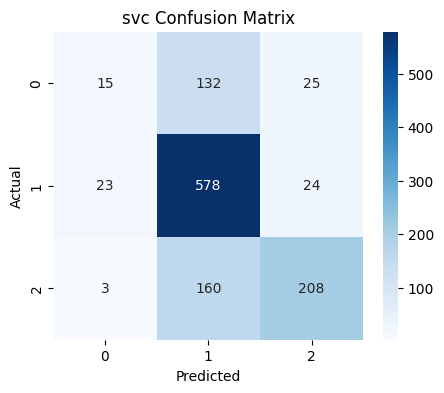

------------tree-------------

Fold 1 accuracy: 0.6135
Fold 2 accuracy: 0.5867
Fold 3 accuracy: 0.6456
Fold 4 accuracy: 0.6024
Fold 5 accuracy: 0.5991

Mean CV accuracy: 0.6095
--------------------------------------------------------------------------------
tree test accuracy score: 0.6095890410958904
--------------------------------------------------------------------------------
tree classification report:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20       172
           1       0.68      0.70      0.69       625
           2       0.68      0.65      0.66       371

    accuracy                           0.61      1168
   macro avg       0.52      0.52      0.52      1168
weighted avg       0.61      0.61      0.61      1168

--------------------------------------------------------------------------------


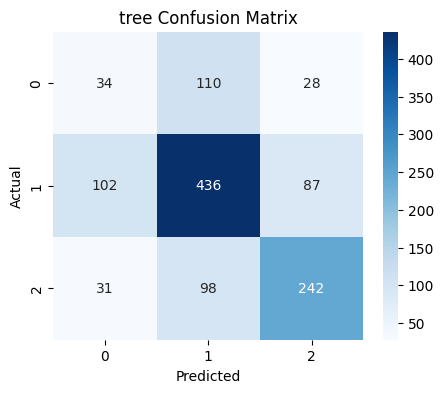

------------ensemble-------------

Fold 1 accuracy: 0.6563
Fold 2 accuracy: 0.6285
Fold 3 accuracy: 0.6660
Fold 4 accuracy: 0.6517


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Split dataset into train and test sets (final evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Initialize CountVectorizer to extract Bag-of-Words features
cv = CountVectorizer()

# 3. Fit CountVectorizer on training data and transform
X_train_cv = cv.fit_transform(X_train)

# 4. Transform test data using the fitted vectorizer
X_test_cv = cv.transform(X_test)

# 5. Define models to train and evaluate
models = {
    "logistic": LogisticRegression(max_iter=200),
    "svc": SVC(),
    "tree": DecisionTreeClassifier(),
    "ensemble": RandomForestClassifier(),
    "naive_bayes": MultinomialNB()
}

# 6. Create StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"------------{name}-------------\n")

    fold_accuracies = []

    # Stratified k-fold cross-validation on training data
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_cv, y_train), 1):
        X_fold_train, X_fold_val = X_train_cv[train_idx], X_train_cv[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

        model.fit(X_fold_train, y_fold_train)
        y_val_pred = model.predict(X_fold_val)

        acc = accuracy_score(y_fold_val, y_val_pred)
        fold_accuracies.append(acc)
        print(f"Fold {fold} accuracy: {acc:.4f}")

    print(f"\nMean CV accuracy: {np.mean(fold_accuracies):.4f}")
    print('-' * 80)

    # Train final model on full training data
    model.fit(X_train_cv, y_train)

    # Evaluate on the test set
    y_pred = model.predict(X_test_cv)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"{name} test accuracy score: {test_acc}")
    print('-' * 80)

    # Classification report
    print(f"{name} classification report:\n{classification_report(y_test, y_pred)}")
    print('-' * 80)

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("=" * 80)


## Using TfidfVectorizer with train-test-split and K-Fold

------------logistic-------------

logistic cross-validation accuracy scores: [0.6862955  0.68950749 0.6745182  0.67845659 0.67738478]
logistic mean CV accuracy: 0.6812
--------------------------------------------------------------------------------
logistic test accuracy score: 0.7029109589041096
--------------------------------------------------------------------------------
logistic classification report:
              precision    recall  f1-score   support

           0       0.43      0.14      0.21       172
           1       0.70      0.89      0.78       625
           2       0.75      0.65      0.70       371

    accuracy                           0.70      1168
   macro avg       0.63      0.56      0.56      1168
weighted avg       0.68      0.70      0.67      1168

--------------------------------------------------------------------------------


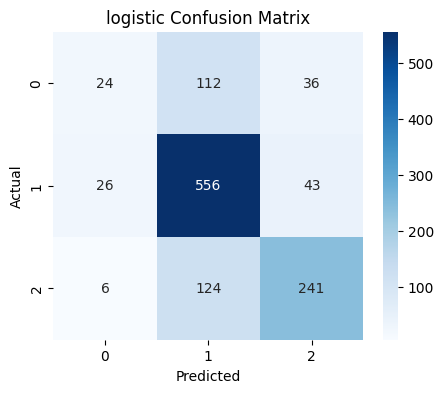

------------svc-------------

svc cross-validation accuracy scores: [0.6627409  0.66059957 0.65417559 0.6602358  0.63987138]
svc mean CV accuracy: 0.6555
--------------------------------------------------------------------------------
svc test accuracy score: 0.6892123287671232
--------------------------------------------------------------------------------
svc classification report:
              precision    recall  f1-score   support

           0       0.31      0.07      0.11       172
           1       0.67      0.92      0.78       625
           2       0.81      0.58      0.68       371

    accuracy                           0.69      1168
   macro avg       0.59      0.53      0.52      1168
weighted avg       0.66      0.69      0.65      1168

--------------------------------------------------------------------------------


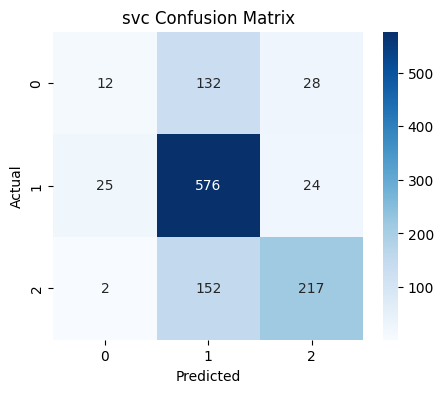

------------tree-------------

tree cross-validation accuracy scores: [0.59957173 0.61027837 0.5856531  0.58628081 0.6130761 ]
tree mean CV accuracy: 0.5990
--------------------------------------------------------------------------------
tree test accuracy score: 0.586472602739726
--------------------------------------------------------------------------------
tree classification report:
              precision    recall  f1-score   support

           0       0.16      0.16      0.16       172
           1       0.67      0.68      0.67       625
           2       0.66      0.63      0.64       371

    accuracy                           0.59      1168
   macro avg       0.49      0.49      0.49      1168
weighted avg       0.59      0.59      0.59      1168

--------------------------------------------------------------------------------


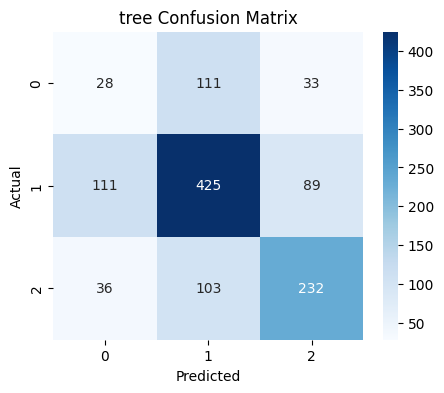

------------ensemble-------------

ensemble cross-validation accuracy scores: [0.64561028 0.66059957 0.64132762 0.63129689 0.65809218]
ensemble mean CV accuracy: 0.6474
--------------------------------------------------------------------------------
ensemble test accuracy score: 0.6601027397260274
--------------------------------------------------------------------------------
ensemble classification report:
              precision    recall  f1-score   support

           0       0.21      0.12      0.15       172
           1       0.67      0.83      0.74       625
           2       0.77      0.63      0.69       371

    accuracy                           0.66      1168
   macro avg       0.55      0.52      0.53      1168
weighted avg       0.63      0.66      0.64      1168

--------------------------------------------------------------------------------


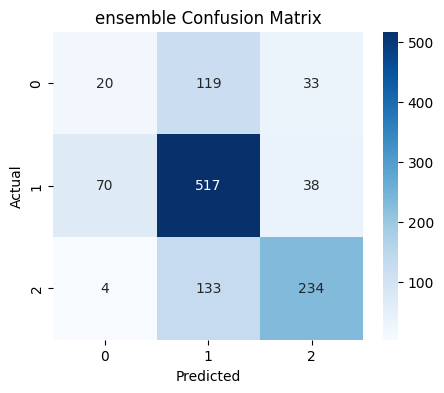

------------naive_bayes-------------

naive_bayes cross-validation accuracy scores: [0.65417559 0.66595289 0.64668094 0.65809218 0.64523044]
naive_bayes mean CV accuracy: 0.6540
--------------------------------------------------------------------------------
naive_bayes test accuracy score: 0.660958904109589
--------------------------------------------------------------------------------
naive_bayes classification report:
              precision    recall  f1-score   support

           0       0.67      0.02      0.04       172
           1       0.64      0.97      0.77       625
           2       0.74      0.43      0.55       371

    accuracy                           0.66      1168
   macro avg       0.68      0.48      0.46      1168
weighted avg       0.68      0.66      0.59      1168

--------------------------------------------------------------------------------


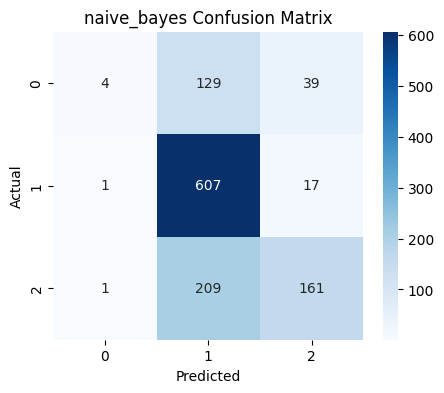

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Split the dataset into training and test sets (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Initialize CountVectorizer for Bag-of-Words extraction
tfidf = TfidfVectorizer()

# 3. Fit CountVectorizer on training data and transform into vector space
X_train_tfidf = tfidf.fit_transform(X_train)

# 4. Transform test data using the vocabulary fitted on training data
X_test_tfidf = tfidf.transform(X_test)

# 5. Define models for training and evaluation
models = {
    "logistic": LogisticRegression(max_iter=200),
    "svc": SVC(),
    "tree": DecisionTreeClassifier(),
    "ensemble": RandomForestClassifier(),
    "naive_bayes": MultinomialNB()
}

# 6. Perform cross-validation and final evaluation
for name, model in models.items():
    print(f"------------{name}-------------\n")

    # Cross-validation on training set (e.g., 5-fold)
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    print(f"{name} cross-validation accuracy scores: {cv_scores}")
    print(f"{name} mean CV accuracy: {np.mean(cv_scores):.4f}")
    print('-' * 80)

    # Train the model on full training set
    model.fit(X_train_tfidf, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)

    # Accuracy on the test set
    y_acc = accuracy_score(y_test, y_pred)
    print(f"{name} test accuracy score: {y_acc}")
    print('-' * 80)

    # Classification report on test set
    print(f"{name} classification report:\n{classification_report(y_test, y_pred)}")
    print('-' * 80)

    # Confusion matrix on test set
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("=" * 80)


## Using Tfidf-Vectorizer with train-test-split and Stratified K-Fold

------------logistic-------------

Fold 1 accuracy: 0.6884
Fold 2 accuracy: 0.6681
Fold 3 accuracy: 0.6916
Fold 4 accuracy: 0.6763
Fold 5 accuracy: 0.6902

Mean CV accuracy: 0.6829
--------------------------------------------------------------------------------
logistic test accuracy score: 0.7029109589041096
--------------------------------------------------------------------------------
logistic classification report:
              precision    recall  f1-score   support

           0       0.43      0.14      0.21       172
           1       0.70      0.89      0.78       625
           2       0.75      0.65      0.70       371

    accuracy                           0.70      1168
   macro avg       0.63      0.56      0.56      1168
weighted avg       0.68      0.70      0.67      1168

--------------------------------------------------------------------------------


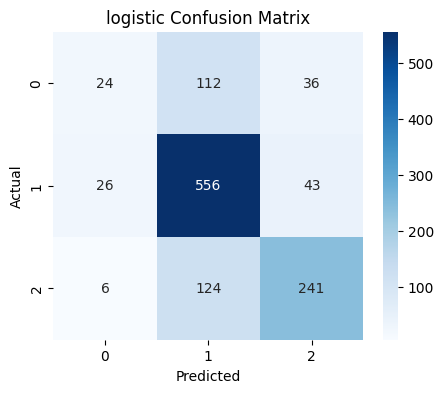

------------svc-------------

Fold 1 accuracy: 0.6649
Fold 2 accuracy: 0.6531
Fold 3 accuracy: 0.6510
Fold 4 accuracy: 0.6377
Fold 5 accuracy: 0.6570

Mean CV accuracy: 0.6527
--------------------------------------------------------------------------------
svc test accuracy score: 0.6892123287671232
--------------------------------------------------------------------------------
svc classification report:
              precision    recall  f1-score   support

           0       0.31      0.07      0.11       172
           1       0.67      0.92      0.78       625
           2       0.81      0.58      0.68       371

    accuracy                           0.69      1168
   macro avg       0.59      0.53      0.52      1168
weighted avg       0.66      0.69      0.65      1168

--------------------------------------------------------------------------------


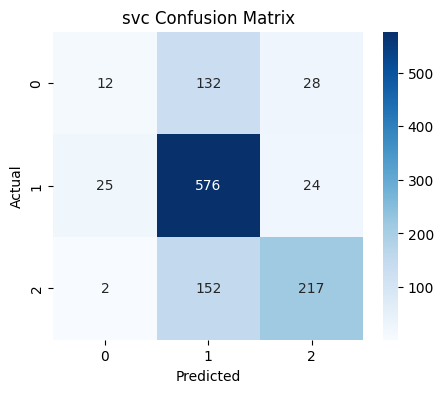

------------tree-------------

Fold 1 accuracy: 0.5996
Fold 2 accuracy: 0.5589
Fold 3 accuracy: 0.5889
Fold 4 accuracy: 0.5916
Fold 5 accuracy: 0.5852

Mean CV accuracy: 0.5848
--------------------------------------------------------------------------------
tree test accuracy score: 0.5898972602739726
--------------------------------------------------------------------------------
tree classification report:
              precision    recall  f1-score   support

           0       0.17      0.17      0.17       172
           1       0.67      0.67      0.67       625
           2       0.66      0.65      0.65       371

    accuracy                           0.59      1168
   macro avg       0.50      0.50      0.50      1168
weighted avg       0.59      0.59      0.59      1168

--------------------------------------------------------------------------------


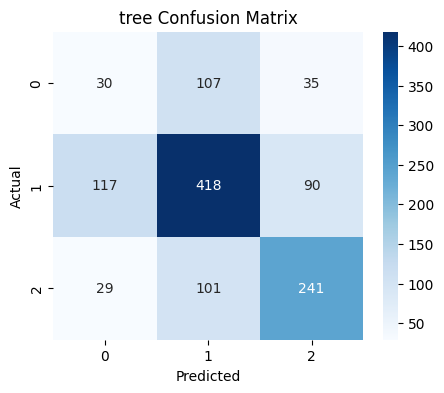

------------ensemble-------------

Fold 1 accuracy: 0.6456
Fold 2 accuracy: 0.6296
Fold 3 accuracy: 0.6563
Fold 4 accuracy: 0.6334
Fold 5 accuracy: 0.6334

Mean CV accuracy: 0.6397
--------------------------------------------------------------------------------
ensemble test accuracy score: 0.6566780821917808
--------------------------------------------------------------------------------
ensemble classification report:
              precision    recall  f1-score   support

           0       0.18      0.09      0.12       172
           1       0.67      0.82      0.74       625
           2       0.76      0.64      0.69       371

    accuracy                           0.66      1168
   macro avg       0.54      0.52      0.52      1168
weighted avg       0.63      0.66      0.63      1168

--------------------------------------------------------------------------------


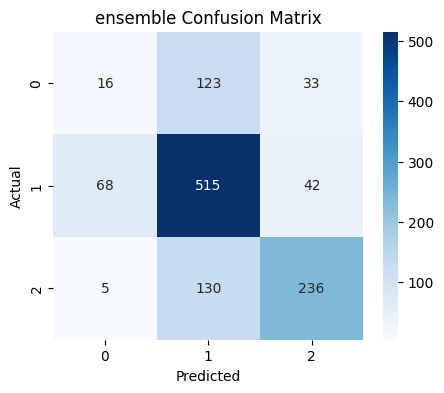

------------naive_bayes-------------

Fold 1 accuracy: 0.6660
Fold 2 accuracy: 0.6381
Fold 3 accuracy: 0.6520
Fold 4 accuracy: 0.6388
Fold 5 accuracy: 0.6752

Mean CV accuracy: 0.6540
--------------------------------------------------------------------------------
naive_bayes test accuracy score: 0.660958904109589
--------------------------------------------------------------------------------
naive_bayes classification report:
              precision    recall  f1-score   support

           0       0.67      0.02      0.04       172
           1       0.64      0.97      0.77       625
           2       0.74      0.43      0.55       371

    accuracy                           0.66      1168
   macro avg       0.68      0.48      0.46      1168
weighted avg       0.68      0.66      0.59      1168

--------------------------------------------------------------------------------


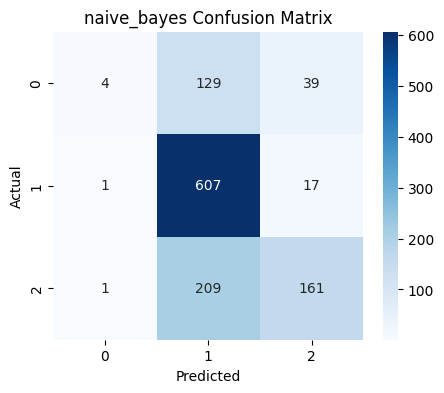

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Split dataset into train and test sets (final evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Initialize CountVectorizer to extract Bag-of-Words features
tfidf = TfidfVectorizer()

# 3. Fit CountVectorizer on training data and transform
X_train_tfidf = tfidf.fit_transform(X_train)

# 4. Transform test data using the fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

# 5. Define models to train and evaluate
models = {
    "logistic": LogisticRegression(max_iter=200),
    "svc": SVC(),
    "tree": DecisionTreeClassifier(),
    "ensemble": RandomForestClassifier(),
    "naive_bayes": MultinomialNB()
}

# 6. Create StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"------------{name}-------------\n")

    fold_accuracies = []

    # Stratified k-fold cross-validation on training data
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_tfidf, y_train), 1):
        X_fold_train, X_fold_val = X_train_tfidf[train_idx], X_train_tfidf[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

        model.fit(X_fold_train, y_fold_train)
        y_val_pred = model.predict(X_fold_val)

        acc = accuracy_score(y_fold_val, y_val_pred)
        fold_accuracies.append(acc)
        print(f"Fold {fold} accuracy: {acc:.4f}")

    print(f"\nMean CV accuracy: {np.mean(fold_accuracies):.4f}")
    print('-' * 80)

    # Train final model on full training data
    model.fit(X_train_tfidf, y_train)

    # Evaluate on the test set
    y_pred = model.predict(X_test_tfidf)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"{name} test accuracy score: {test_acc}")
    print('-' * 80)

    # Classification report
    print(f"{name} classification report:\n{classification_report(y_test, y_pred)}")
    print('-' * 80)

    # Confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("=" * 80)
